In [1]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
workingdir = "/content/drive/MyDrive/Manning - Liveprojects/Sentiment Analysis/dataset"
export_small_corpus_sentiment_neg_csv = f"{workingdir}/small_corpus_sentiment_withnegation.csv"
df = pd.read_csv(export_small_corpus_sentiment_neg_csv, sep='\t')

In [5]:
df.head()

,ratings,reviews,sentiments
0,1.0,Made in china... either a single bad luck of t...,0.000000
1,1.0,"Having played all of the other games, I was so...",-0.076923
2,1.0,"Macro buttons in the way (obviously?), can't l...",0.000000
3,1.0,"Just received my ""Cronusmax Plus"" and after so...",-0.005780
4,1.0,"Not worth the learning curve, the nunchuck+wii...",0.047619


### Sentiment score

In [28]:
def determine_sentiment_label(sentiment):
  if (sentiment > 0.2):
    return 'positive'
  if (sentiment < -0.2):
    return 'negative'
  return 'neutral'

In [29]:
df['sentiment_labels'] = [determine_sentiment_label(s) for s in df['sentiments']]

In [30]:
df.head()

,ratings,reviews,sentiments,sentiment_labels
0,1.0,Made in china... either a single bad luck of t...,0.000000,neutral
1,1.0,"Having played all of the other games, I was so...",-0.076923,neutral
2,1.0,"Macro buttons in the way (obviously?), can't l...",0.000000,neutral
3,1.0,"Just received my ""Cronusmax Plus"" and after so...",-0.005780,neutral
4,1.0,"Not worth the learning curve, the nunchuck+wii...",0.047619,neutral


## Rating score

In [31]:
def determine_rating_label(sentiment):
  if (sentiment == 5):
    return 'positive'
  if (sentiment == 1):
    return 'negative'
  return 'neutral'

In [32]:
df['rating_labels'] = [determine_rating_label(s) for s in df['sentiments']]

In [33]:
df.head()

,ratings,reviews,sentiments,sentiment_labels,rating_labels
0,1.0,Made in china... either a single bad luck of t...,0.000000,neutral,neutral
1,1.0,"Having played all of the other games, I was so...",-0.076923,neutral,neutral
2,1.0,"Macro buttons in the way (obviously?), can't l...",0.000000,neutral,neutral
3,1.0,"Just received my ""Cronusmax Plus"" and after so...",-0.005780,neutral,neutral
4,1.0,"Not worth the learning curve, the nunchuck+wii...",0.047619,neutral,neutral


## Export

In [34]:
def exportcsv(dataframe, fname):
  with open(fname, "w") as outfile:
    outfile.write(dataframe.to_csv( index=False, sep="\t", encoding="utf-8"))

export_small_corpus_sentiment_scores_csv = f"{workingdir}/small_corpus_sentiment_scores.csv"
exportcsv(df, export_small_corpus_sentiment_scores_csv)

## Evaluate

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [39]:
accuracy_score(df['sentiment_labels'], df['rating_labels'])

0.9122222222222223

[[   0   51    0]
 [   0 4105    0]
 [  80  264    0]]


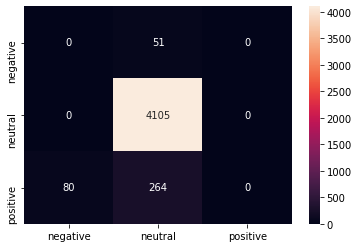

In [62]:
labels = ["negative",  "neutral", "positive"]
cm = confusion_matrix(df['sentiment_labels'], df['rating_labels'])
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
print(cm)

In [57]:
print(classification_report(df['sentiment_labels'], df['rating_labels'], target_names=labels))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        51
     neutral       0.93      1.00      0.96      4105
    positive       0.00      0.00      0.00       344

    accuracy                           0.91      4500
   macro avg       0.31      0.33      0.32      4500
weighted avg       0.85      0.91      0.88      4500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
